In [2]:
# check current directory
import os
os.getcwd()

# change directory to where the data is
os.chdir('/home/uccacbo/CrystaLLM')
os.getcwd()

'/home/uccacbo/CrystaLLM'

In [65]:
!python bin/train.py --config=config/cif_extd_BG/finetune_head_BG.yaml

Resuming from model_ckpts/pretrained_models/large_model_untouched...
Reading start indices from CIF_BG_proj/BG_large_tokens/starts.pkl...
Reading start indices from CIF_BG_proj/BG_large_tokens/starts_val.pkl...
{'Si': 0, 'C': 1, 'Pb': 2, 'I': 3, 'Br': 4, 'Cl': 5, 'Eu': 6, 'O': 7, 'Fe': 8, 'Sb': 9, 'In': 10, 'S': 11, 'N': 12, 'U': 13, 'Mn': 14, 'Lu': 15, 'Se': 16, 'Tl': 17, 'Hf': 18, 'Ir': 19, 'Ca': 20, 'Ta': 21, 'Cr': 22, 'K': 23, 'Pm': 24, 'Mg': 25, 'Zn': 26, 'Cu': 27, 'Sn': 28, 'Ti': 29, 'B': 30, 'W': 31, 'P': 32, 'H': 33, 'Pd': 34, 'As': 35, 'Co': 36, 'Np': 37, 'Tc': 38, 'Hg': 39, 'Pu': 40, 'Al': 41, 'Tm': 42, 'Tb': 43, 'Ho': 44, 'Nb': 45, 'Ge': 46, 'Zr': 47, 'Cd': 48, 'V': 49, 'Sr': 50, 'Ni': 51, 'Rh': 52, 'Th': 53, 'Na': 54, 'Ru': 55, 'La': 56, 'Re': 57, 'Y': 58, 'Er': 59, 'Ce': 60, 'Pt': 61, 'Ga': 62, 'Li': 63, 'Cs': 64, 'F': 65, 'Ba': 66, 'Te': 67, 'Mo': 68, 'Gd': 69, 'Pr': 70, 'Bi': 71, 'Sc': 72, 'Ag': 73, 'Rb': 74, 'Dy': 75, 'Yb': 76, 'Nd': 77, 'Au': 78, 'Os': 79, 'Pa': 80, 'S

In [6]:
!python bin/train.py --config=config/regression_BG/regression_BG_LoRA.yaml

Resuming from model_ckpts/pretrained_models/large_model_untouched...
/home/uccacbo/CrystaLLM/bin/train.py:106: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=3),
[I 2024-11-28 10:35:40,439] Using an existing study with name 'hp_search_regression_LoRA' instead of creating a new one.
Using an existing study with name 'hp_search_regression_LoRA' instead of creating a new one.
Training samples: 221, Validation samples: 13, Test samples: 13

Saved test dataset to CIF_BG_proj/test_dataset.pkl.gz

Resuming training from model_ckpts/pretrained_models/large_model_untouched...

Using configuration:
out_dir: model_ckpts/pretrained_models/large_model_untouched
ckpt_out_dir: model_ckpts/regression_models/BG_LoRA_test/search_trial_1
eval_interval: 2
log_interval: 2
eval_iters_train: 2
eval_iters_val: 2
eval_only: false
always_save_checkpoint: false
init_f

In [14]:
!python bin/regr_inference.py

Loaded test dataset with 13 samples.
Model configuration: {'out_dir': 'model_ckpts/pretrained_models/small_model_untouched', 'ckpt_out_dir': 'model_ckpts/regression_models/BG_all_test', 'eval_interval': 5, 'log_interval': 2, 'eval_iters_train': 2, 'eval_iters_val': 2, 'eval_only': False, 'always_save_checkpoint': False, 'init_from': 'resume', 'wandb_log': False, 'wandb_project': 'crystallm_CIF_BG_tests', 'wandb_run_name': 'BG_large_all', 'dataset': 'CIF_BG_proj/table_MP_500_tokens.pkl.gz', 'gradient_accumulation_steps': 4, 'batch_size': 1, 'block_size': 1024, 'n_layer': 16, 'n_head': 16, 'n_embd': 1024, 'dropout': 0.1, 'bias': False, 'learning_rate': 0.0001, 'max_iters': 4, 'weight_decay': 0.1, 'beta1': 0.9, 'beta2': 0.99, 'grad_clip': 1.0, 'decay_lr': True, 'warmup_iters': 100, 'lr_decay_iters': 50, 'min_lr': 1e-05, 'device': 'cuda', 'dtype': 'bfloat16', 'compile': True, 'underrep_p': 0.0, 'validate': True, 'codecarbon': False, 'tracker_project': 'crystallm', 'metrics_dir': 'comp_metr

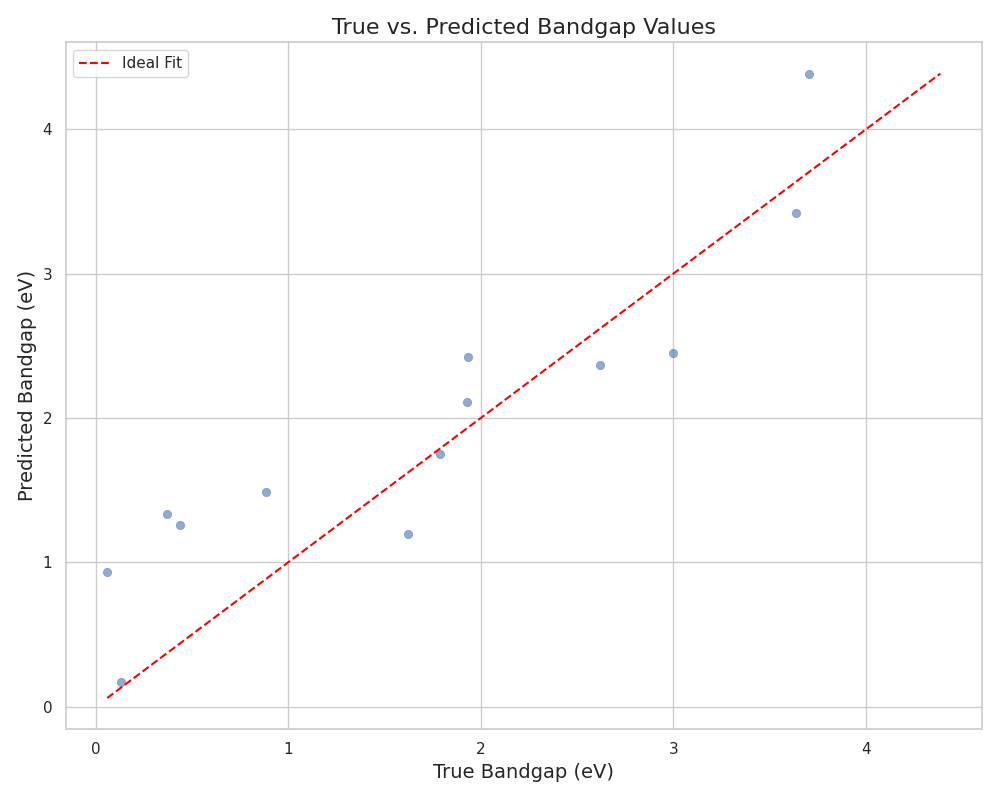

In [15]:
from IPython.display import Image, display

# Display the saved plot
display(Image(filename='true_vs_predicted_bandgap.png'))


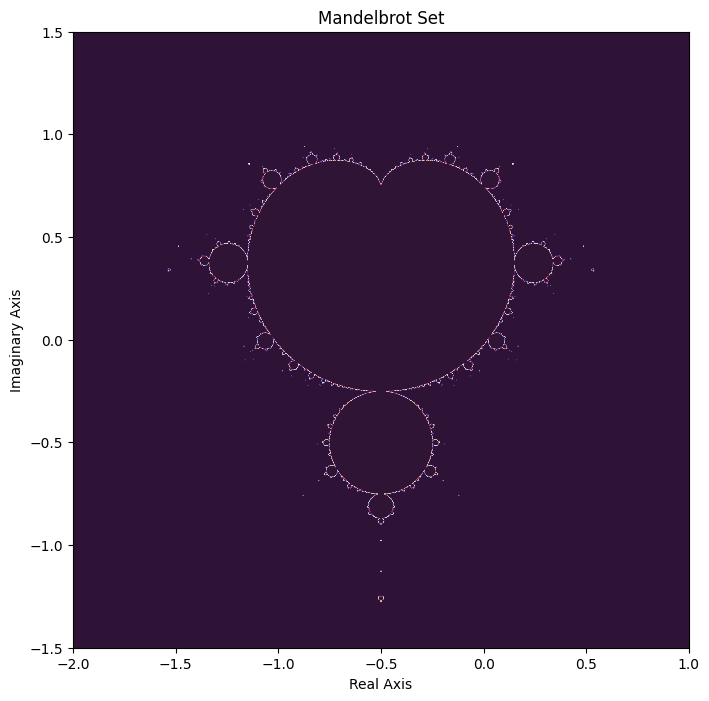

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(h, w, max_iter):
    """
    Generate the Mandelbrot set fractal.

    Parameters:
    - h: Height of the image in pixels.
    - w: Width of the image in pixels.
    - max_iter: Maximum number of iterations to determine divergence.

    Returns:
    - A 2D numpy array representing the Mandelbrot set.
    """
    # Define the real and imaginary ranges of the complex plane
    real = np.linspace(-2.0, 1.0, w)
    imag = np.linspace(-1.5, 1.5, h)
    real, imag = np.meshgrid(real, imag)
    c = real + imag * 1j  # Create a complex grid
    z = np.zeros_like(c)
    mandelbrot_set = np.full(c.shape, True, dtype=bool)

    for i in range(max_iter):
        z = z**2 + c
        diverged = np.abs(z) > 2
        mandelbrot_set[diverged] = False
        z[diverged] = 0  # Reset to avoid overflow

    return mandelbrot_set

# Parameters for the image
height = 1000
width = 1500
max_iterations = 1000

# Generate the Mandelbrot set
mandelbrot_image = mandelbrot(height, width, max_iterations)

# Plotting the Mandelbrot set
plt.figure(figsize=(12, 8))
plt.imshow(mandelbrot_image.T, extent=[-2, 1, -1.5, 1.5], cmap='twilight_shifted', origin='lower')
plt.title('Mandelbrot Set')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()


In [1]:
%matplotlib inline